In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('braznikova2_prep.csv', sep=';')
df.head(10)

,Y,X3,X5,X6,X7,X8,X9,X10,X12,X13,X14
0,0,0,0,659,0,1092.0,13884.0,0,0,0,1
1,0,0,1,1518,1,348.0,11700.0,0,0,1,1
2,0,0,0,476,2,504.0,6786.0,0,0,1,1
3,0,0,0,1310,3,418.0,12948.0,0,0,1,1
4,0,1,2,2029,4,108.0,11427.0,0,0,0,0
5,0,1,3,3585,5,120.0,11856.0,0,1,0,0
6,1,0,4,4621,6,6.0,14508.0,0,0,0,0
7,1,0,5,8150,7,292.0,11310.0,0,0,0,0
8,0,0,0,1624,8,290.0,12324.0,0,0,0,0
9,0,1,6,3790,9,660.0,13455.0,0,0,0,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Y','X3','X5','X6','X7','X8','X9','X10','X12','X13','X14'])

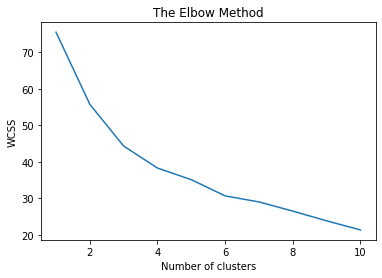

In [4]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

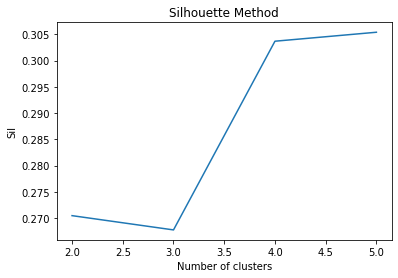

2:0.2704655604400863
3:0.2677480580639979
4:0.3036878529733459
5:0.305396322578919


In [5]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Метод утверждает, что чем больше кластеров выделить - тем лучше.

In [6]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Y','X3','X5','X6','X7','X8','X9','X10','X12','X13','X14']).round(2)

,Y,X3,X5,X6,X7,X8,X9,X10,X12,X13,X14
0,0.0,0.18,0.18,0.20,0.41,0.25,0.60,-0.00,0.00,0.18,1.00
1,0.0,0.33,0.23,0.29,0.43,0.19,0.71,-0.00,0.19,0.07,0.00
2,1.0,0.14,0.37,0.63,0.56,0.25,0.66,0.16,0.16,0.08,0.32


In [7]:
X = df.iloc[:, [0, 1, 2, 3, 7, 10 ]]

In [8]:
# Fitting K-Means to the dataset
km_znach = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms_znach = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms_znach.cluster_centers_, columns = ['Y','X3','X5','X6','X10','X14']).round(2)

,Y,X3,X5,X6,X10,X14
0,0.0,0.18,0.18,0.20,-0.00,1.00
1,0.0,0.33,0.23,0.29,-0.00,0.00
2,1.0,0.14,0.37,0.63,0.16,0.32


In [9]:
# Fitting K-Means to the dataset
km_znach1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms_znach1 = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms_znach1.cluster_centers_, columns = ['Y','X3','X5','X6','X10','X14']).round(2)

,Y,X3,X5,X6,X10,X14
0,-0.0,0.27,0.21,0.25,0.00,0.39
1,1.0,0.14,0.37,0.63,0.16,0.32


In [10]:
# Importing hc clusters
import pickle
input = open('clust-hc.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [11]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.9232267665656823

In [12]:
# Importing hc clusters
import pickle
input = open('clust-hc_znach.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc_znach = obj["hc_znach"]

In [13]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_znach,km_znach)

1.0

In [14]:
# Importing hc clusters
import pickle
input = open('clust-hc_znach1.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc_znach1 = obj["hc_znach1"]

In [15]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc_znach1,km_znach1)

1.0

Как видно: модели на значимых переменных пересекаются на 100%, что указывает на высокое качество. Так же кластера вариативны и 2- оптимальное число кластеров для выделения успешных и неуспешных магазинов. Именно эту модель я буду использовать, как итоговую

In [17]:
# Export km clusters
import pickle
obj = {'km_znach1': km_znach1}
output = open('clust-km_znach1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()